In [34]:
# The imports
import pickle as pkl
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# Load the data
data_tissue = h5py.File("/u/dutilfra/milatmp1/transcriptome/graph/dataset.hdf5", 'r')
data_brca = h5py.File("/data/lisa/data/genomics/TCGA/BRCA_coexpr.hdf5", 'r')


In [64]:
def show_features(path, data):
    
    # load the features
    if '.pkl' not in path:
        path += '/features.pkl'
    
    features = pkl.load(open(path))

    
    for i, layer in enumerate(features):
        print "For layer", i
        for k, v in layer.iteritems():
            print "For class", k
            # Get the best features
            node_name, node_idx = v
            idx = np.array(range(len(node_name)))
            # Get the correspinding gene value for positiv dans negative
            class_idx = data['labels_data'].attrs[k]
            pos = np.array(data['expression_data'])[np.array(data['labels_data'][:, class_idx] == 1)].mean(axis=0)
            neg = np.array(data['expression_data'])[np.array(data['labels_data'][:, class_idx] == 0)].mean(axis=0)

            plt.bar(idx, height=pos[node_idx], label='From {}'.format(k)) # plt.bar don't like me :(
            plt.bar(idx + 0.25, height=neg[node_idx], label='Not from {}'.format(k))
            plt.legend()
            plt.xticks(range(len(node_name)), node_name, rotation='vertical')
            print node_idx
            print node_name
            plt.show()

In [65]:
data_brca.keys()

[u'expression_data',
 u'gene_names',
 u'graph_data',
 u'labels_data',
 u'sample_names']

In [66]:
np.array(data_brca['labels_data'][:, [0, 7]]).sum(axis=0) / np.array(data_brca['labels_data'][:, [0, 7]]).sum()

array([ 0.80662489,  0.19337511], dtype=float32)

For logistic regression
For layer 0
For class Infiltrating Ductal Carcinoma
[6414 6176  654 2073 1743 5042 1310 4392 5895 2389 3685 6987 5387 2710 1230
 3025 5608 4394 6082 6032 1680 1371  534 3864 7012]
['CDH1' 'CYP2A6' 'UGT2B15' 'PAH' 'CLEC3A' 'F7' 'DES' 'GSTM1' 'HOXB6'
 'PRAME' 'CHGB' 'GP2' 'UGT1A6' 'MYO15A' 'PLA2G2A' 'MMP9' 'PITX1' 'GSTM3'
 'ACTG2' 'CYP4B1' 'CPB1' 'GDA' 'SLC18A2' 'MSLN' 'TSHR']


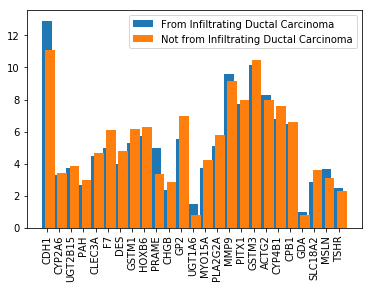

For class Infiltrating Lobular Carcinoma
[6414 2073  821 5896 5831 6968 6385 4021 1506 4351 1743 2710 5387 1303 5895
 2743 1371 5275 7097 6176 2552  632 6707 3864 3469]
['CDH1' 'PAH' 'TFAP2B' 'HOXB5' 'S100A2' 'MYL7' 'TFF1' 'TMEM158' 'KCNC2'
 'CHI3L1' 'CLEC3A' 'MYO15A' 'UGT1A6' 'STC1' 'HOXB6' 'HIST1H2BJ' 'GDA'
 'NEFH' 'ABCC8' 'CYP2A6' 'CYP4F12' 'SYT5' 'STEAP1' 'MSLN' 'TLX1']


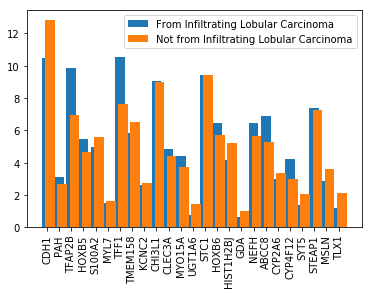

For CGN
For layer 0
For class Infiltrating Ductal Carcinoma
[5519 3417 3184 5562 2327 4612 6176 7064 3242 2965  654 3175 3435 4999 7049
 3962 1979 7081 3840  553 4352 6510 1213 3625 1555]
['ASB5' 'AKR1C2' 'SHCBP1L' 'AFP' 'EEF2K' 'MMACHC' 'CYP2A6' 'PDE4C' 'NAGK'
 'SEMA5A' 'UGT2B15' 'ANKRD50' 'GPX2' 'IRGC' 'CHRNB4' 'PRKAB2' 'LEFTY2'
 'RAP1GAP' 'PLCH1' 'IL2RB' 'EPB42' 'CARD18' 'LCMT1' 'PABPC5' 'GNG5']


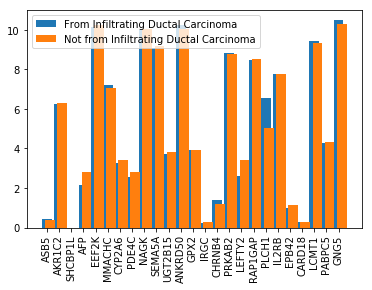

For class Infiltrating Lobular Carcinoma
[5519 3417 6176 3184 7064 4612 5562 2327 3242 3175  654  553 3962 1213 1979
 7081 3435 6510 3786 2965 5959 1812 4999 3625 1555]
['ASB5' 'AKR1C2' 'CYP2A6' 'SHCBP1L' 'PDE4C' 'MMACHC' 'AFP' 'EEF2K' 'NAGK'
 'ANKRD50' 'UGT2B15' 'IL2RB' 'PRKAB2' 'LCMT1' 'LEFTY2' 'RAP1GAP' 'GPX2'
 'CARD18' 'GFAP' 'SEMA5A' 'ATP13A1' 'TCF20' 'IRGC' 'PABPC5' 'GNG5']


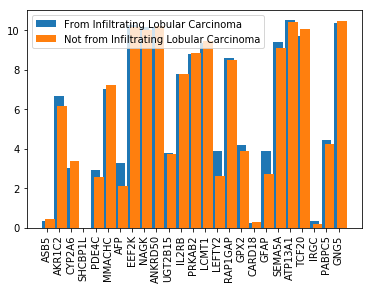

For LCG
For layer 0
For class Infiltrating Ductal Carcinoma
[6415 6414 3238 2005 3161 2004 5204 6368 4020 3113 2111  251 3239 3742 5064
 1082 2073 4196 3884 3914  637 1830 2711 2046 2951]
['CDH3' 'CDH1' 'TXNL1' 'NUBP1' 'PIR' 'PFN2' 'APOC4' 'SPCS3' 'PEX12' 'PPIH'
 'GAPDH' 'SRSF5' 'TMX4' 'DGAT2' 'HSD17B6' 'NEK2' 'PAH' 'PLA2G5' 'SNRNP40'
 'SLC16A2' 'FUBP3' 'KARS' 'TLR9' 'NFYB' 'SF3A1']


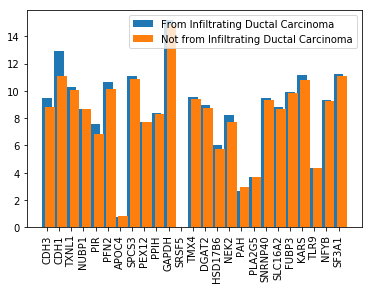

For class Infiltrating Lobular Carcinoma
[6415 6414 3239 3113 2004 3261 5237 3160 1896 6312 5194 3158 5830 5064  812
 5548  250 3047  909  458 2072  832 3742 2187 7117]
['CDH3' 'CDH1' 'TMX4' 'PPIH' 'PFN2' 'APRT' 'LBP' 'FLII' 'PISD' 'ADAM9'
 'THOP1' 'PDE7A' 'DECR1' 'HSD17B6' 'HIST2H2BE' 'MXD3' 'ZSCAN2' 'USP39'
 'CPNE1' 'KCNK4' 'TM2D2' 'C1D' 'DGAT2' 'CDK2AP1' 'EDN3']


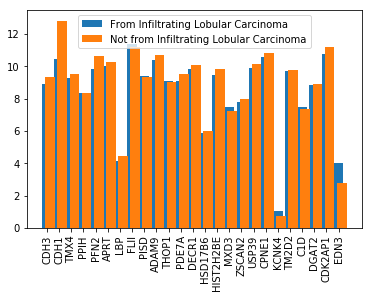

In [67]:
# A few examples, here it's from a normal logistic regression on tissue type:

print "For logistic regression"
show_features('/data/milatmp1/dutilfra/transcriptome/graph/TCGA_BRCA/exp1/num_channel=16_num_layer=0_lr=0.001_model=cgn/',
             data_brca)

print "For CGN"
show_features('/data/milatmp1/dutilfra/transcriptome/graph/TCGA_BRCA/exp1/num_channel=16_num_layer=1lr=0.01_model=cgn/',
             data_brca)

print "For LCG"
show_features('/data/milatmp1/dutilfra/transcriptome/graph/TCGA_BRCA/exp1/num_channel=2_num_layer=1_lr=0.01_model=lcg_nb/',
             data_brca)


#show_features('/data/milatmp1/dutilfra/transcriptome/graph/TCGA_BRCA/cgn/dataset=tcga-brca_batch_size=100_num_channel=16_seed=1993_weight_decay=0.0_l1_loss=0.0_not_norm_adj=False_num_layer=1_scale_free=False_epoch=100_skip_connections=False_lr=0.001_model=cgn_nb_class=2_train_ratio=0.8_momentum=0.9',
#             data_brca)

For layer 0
For class Cervix


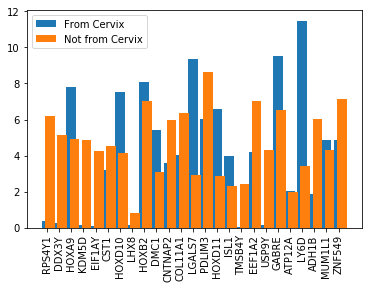

For class Testis


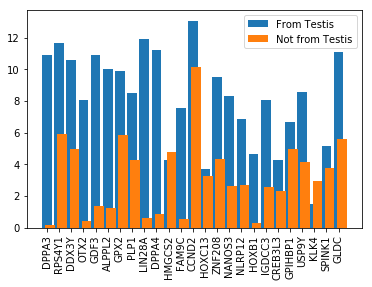

For class Eye


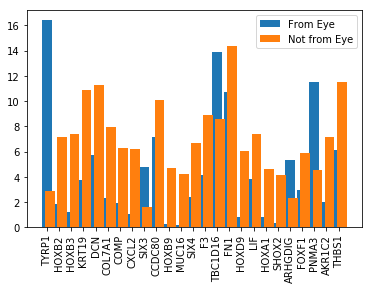

For class Head and Neck region


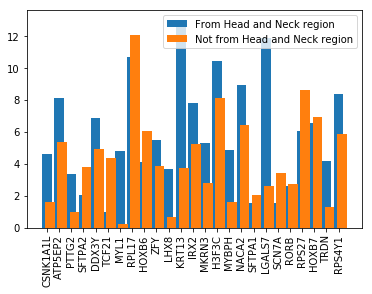

For class Adrenal gland


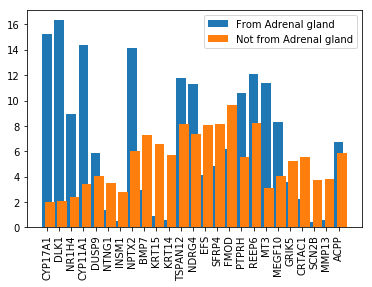

For class Stomach


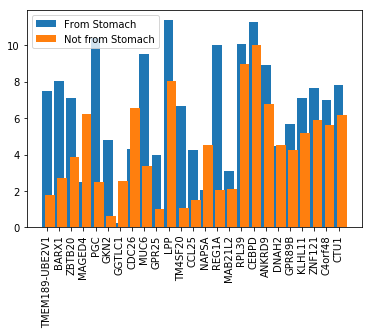

For class Bladder


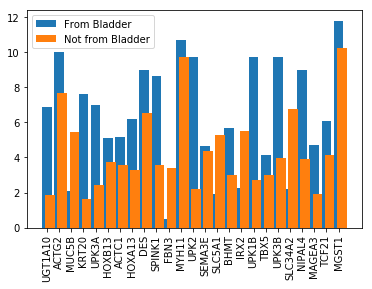

For class Lymphatic tissue


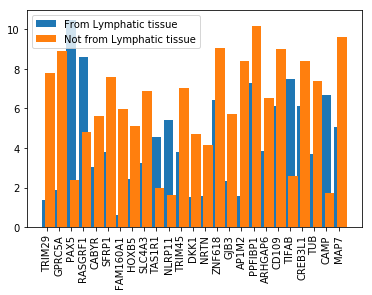

For class Breast


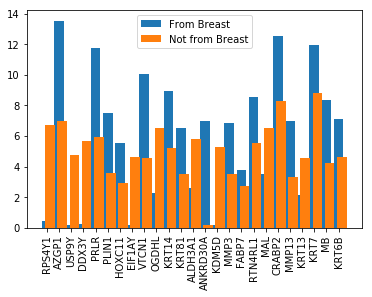

For class Colon


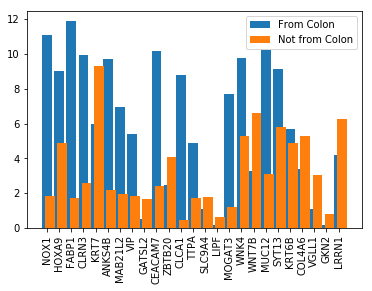

For class Rectum


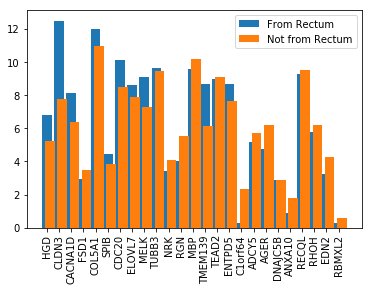

For class Prostate


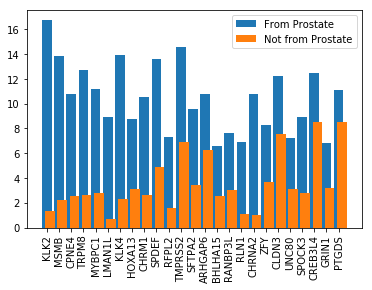

For class Liver


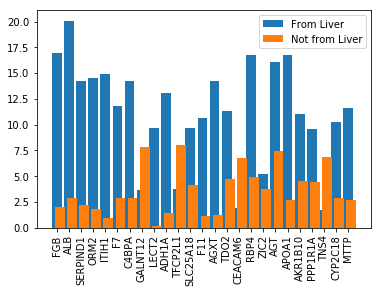

For class Lining of body cavities


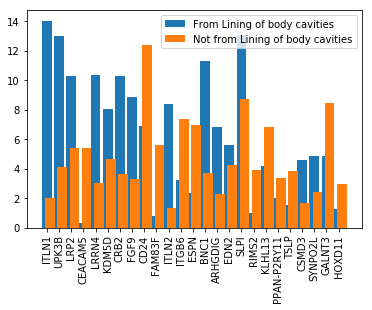

For class Thymus


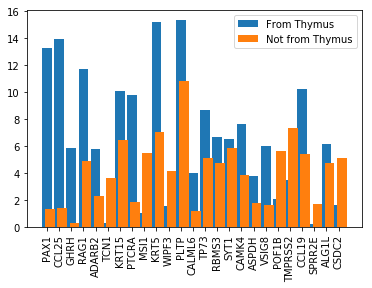

For class Uterus


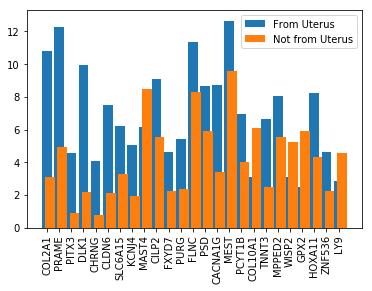

For class Ovary


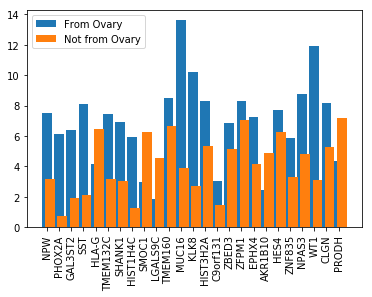

For class White blood cell


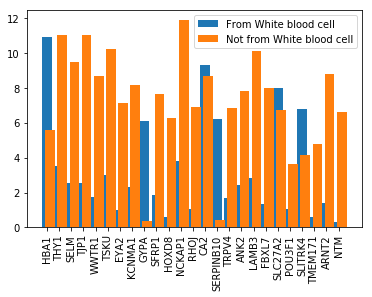

For class Soft tissue,Bone


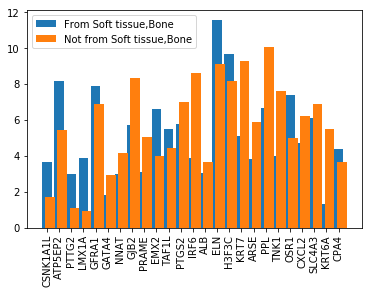

For class Bile duct


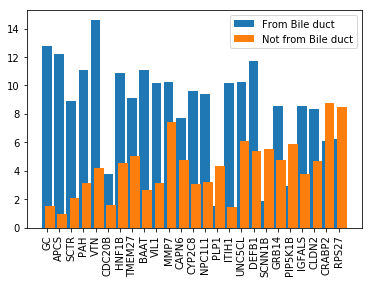

For class Paraganglia


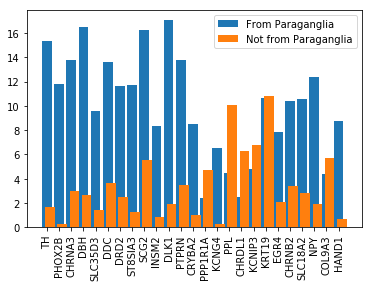

For class Endometrium


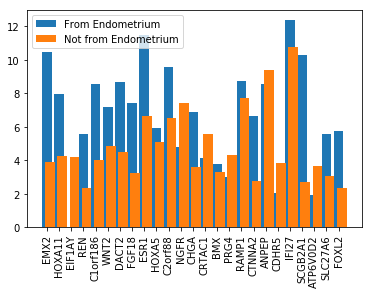

For class Brain


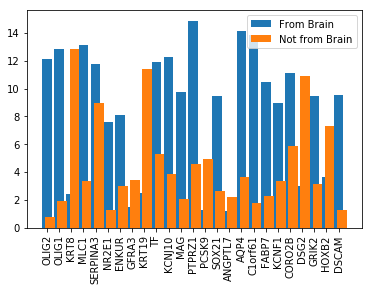

For class Thyroid Gland


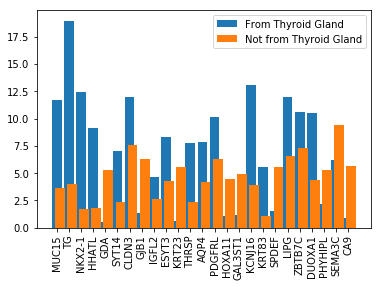

For class Lung


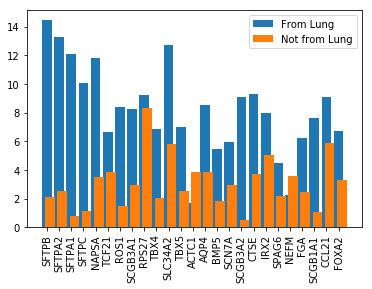

For class Skin


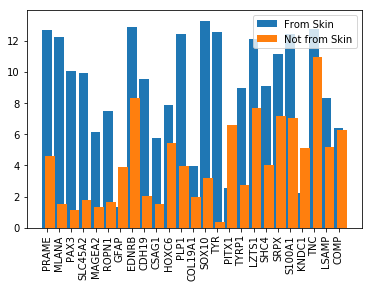

For class Esophagus


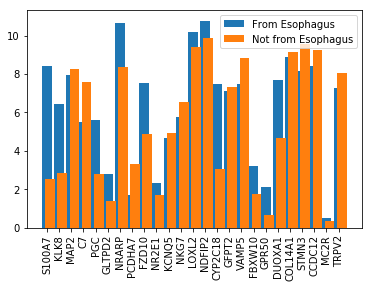

For class Pancreas


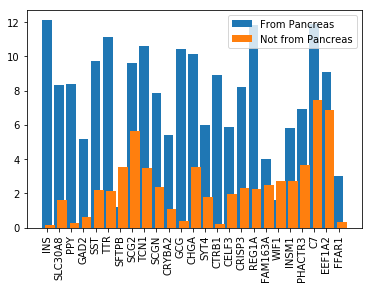

For class Kidney


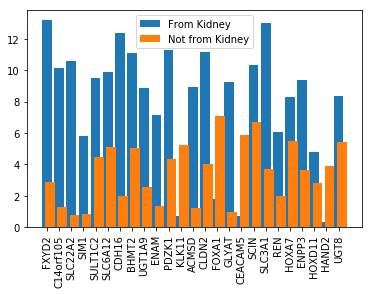

In [7]:
# Here from a small cgn on breast cancer:
show_features('./testing123/dataset=tcga-tissue_batch_size=100_num_channel=32_seed=1993_weight_decay=0.0_l1_loss=0.0_not_norm_adj=False_scale_free=False_epoch=20_num_layer=0_lr=0.01_model=cgn_train_ratio=0.8_momentum=0.9',
             data_tissue)


In [75]:
# Get the neighbourhood of a given gene:

def get_Nx(gene_name, graph):
    gene_idx = np.argwhere(np.array(graph['gene_names']) == gene_name)[0][0]
    return np.array(graph['gene_names'])[np.argwhere(graph['graph_data'][gene_idx])]


In [82]:
genes = ['ASB5', 'AKR1C2', 'CYP2A6', 'SHCBP1L', 'PDE4C', 'MMACHC', 'AFP', 'EEF2K', 'NAGK',
 'ANKRD50', 'UGT2B15', 'IL2RB', 'PRKAB2', 'LCMT1', 'LEFTY2', 'RAP1GAP', 'GPX2',
 'CARD18', 'GFAP', 'SEMA5A', 'ATP13A1', 'TCF20', 'IRGC', 'PABPC5', 'GNG5']

genes = ['CDH3', 'CDH1', 'TMX4', 'PPIH', 'PFN2', 'APRT', 'LBP', 'FLII', 'PISD', 'ADAM9',
 'THOP1', 'PDE7A', 'DECR1', 'HSD17B6', 'HIST2H2BE', 'MXD3', 'ZSCAN2', 'USP39',
 'CPNE1', 'KCNK4', 'TM2D2', 'C1D', 'DGAT2', 'CDK2AP1', 'EDN3']

all_n = [get_Nx(x, data_brca) for x in genes]

for i, g in enumerate(genes):
    print "Neighbourhood for", g
    print ", ".join([str(x[0]) for x in all_n[i]])
    print 

Neighbourhood for CDH3
ITGA3, ITGA6, ZNF2, RAC1, GLG1, MYO1E, MYO1B, ZFAND3, BMP1, IL4R, BTG3, TP53I3, CAMSAP2, RND3, B3GNT5, MCL1, SHC1, SPEG, KRT7, KRT5, GMEB1, NCAPG2, ACTN3, ADAM17, PYCARD, DNMT3B, NDEL1, NFIL3, PTPRZ1, LIPG, FEZ1, CAV2, CAV1, CYFIP1, SERPINB5, HTR2A, GNAI1, ACTN4, PTPRK, ABLIM1, KRT17, GABRE, TLE1, MBD1, LAD1, PDXK, CLCP1, LRP11, PRNP, PRRG1, TMSB10, PAM, TRIM29, RTKN, KIAA1147, CDK2AP1, FAT1, FZD6, RYK, YBX3, WT1, VSNL1, FBN2, SPTB, ADAMTSL4, CXCL1, CXCL2, NRCAM, SPRR1B, FERMT1, SGK1, MT1X, MT1H, MT1G, TGFBI, PLD2, WASF1, WASF3, FAS, CCK, MYOF, ITGB1, ITGB4, EXT2, EXT1, ITPKC, FABP5, GADD45A, GADD45B, GADD45G, SH3BGRL3, TEAD1, TFPI2, SIGLEC7, BARX2, CACNA1D, TES, GSTP1, DST, GSTO1, TRIP10, PPP1R14C, COL17A1, GPR87, ADAM23, ANXA4, RANGAP1, PXN, ANGPTL4, MMP14, SLC35C1, IQGAP1, LAMC2, C2CD4C, FAM127B, IGFBP6, TM4SF1, PPP1R12B, CD109, SMTN, CDH13, NXN, CPA4, F2RL1, ADRB2, ALDH1A3, S100A2, ACVR1, KLF6, AMOTL2, LTBR, TRIP6, LRRC8A, LEP, DGKA, VEGFC, BNC1, ABCC3, EPHB4